In [1]:
import tensorflow as tf
from scipy.misc import imread

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
image = imread('8.jpg', mode='L')
image

array([[152, 153, 152, ..., 143, 143, 143],
       [154, 152, 153, ..., 144, 142, 143],
       [153, 153, 153, ..., 142, 142, 143],
       ..., 
       [139, 140, 139, ..., 130, 131, 131],
       [138, 137, 138, ..., 131, 128, 128],
       [139, 139, 139, ..., 130, 129, 129]], dtype=uint8)

In [4]:
sess = tf.InteractiveSession()

In [5]:
img = tf.constant(image)
img.shape


TensorShape([Dimension(250), Dimension(250)])

In [6]:
img.eval()

array([[152, 153, 152, ..., 143, 143, 143],
       [154, 152, 153, ..., 144, 142, 143],
       [153, 153, 153, ..., 142, 142, 143],
       ..., 
       [139, 140, 139, ..., 130, 131, 131],
       [138, 137, 138, ..., 131, 128, 128],
       [139, 139, 139, ..., 130, 129, 129]], dtype=uint8)

In [7]:
img2 = tf.expand_dims(img, -1)
img2.shape
# img2.eval()

TensorShape([Dimension(250), Dimension(250), Dimension(1)])

In [8]:
img_resize = tf.image.resize_images(img2, [28,28])
img_resize
# print(img_r.eval())

<tf.Tensor 'Squeeze:0' shape=(28, 28, 1) dtype=float32>

[26.316339, 153.85715]
[0.0, 1.0, 0.80284649]


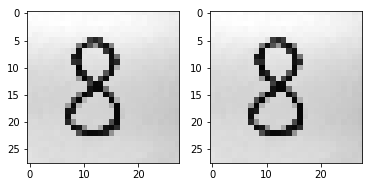

In [9]:
# show standardized image
# use naive method
img_max = tf.reduce_max(img_resize)
img_min = tf.reduce_min(img_resize)
print ([img_min.eval(), img_max.eval()])

std_img = tf.div( tf.subtract( img_resize, img_min), tf.subtract(img_max, img_min) )
print ([tf.reduce_min(std_img).eval(), tf.reduce_max(std_img).eval(),  tf.reduce_mean(std_img).eval()])

fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img_resize.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(std_img.eval()[:,:,0], cmap = 'gray')


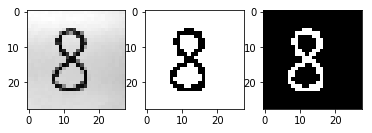

In [10]:
# show binarized image
# use naive method (the contrast adjustment in TF is not useful)

# then inverse the image

bin_img = tf.ceil( tf.subtract(std_img, 0.7) )

inv_img = tf.abs( tf.subtract(bin_img, 1) )

fig = plt.figure()
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(img_resize.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(bin_img.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(inv_img.eval()[:,:,0], cmap = 'gray')

In [11]:
# reshape img tensor to vector
input_img = tf.reshape(inv_img, [1, 784])
# print input_img.eval()

In [ ]:
# it works in terminal, but not in notebook
x = tf.placeholder(tf.float32, [None, 784], name="input")
W = tf.Variable(tf.zeros([784, 10]), name = "w1")
b = tf.Variable(tf.zeros([10]), name = "b1")
y = tf.nn.softmax(tf.matmul(x, W) + b)

# swd--save the Checkpoint file
saver = tf.train.Saver()
with tf.Session() as sess:
    # swd save ckpt
    saver.restore(sess, "saved_model/model.ckpt")
    print("Model restored.")
    np.set_printoptions(precision = 2)
    result=sess.run(y,feed_dict={x: img})
    # result=sess.run(y,  feed_dict={x: input_img.eval()})
    print(result)
    print('The number is: '+str(np.argmax(result)))
    
end=time.time()
print ("Computing time: "+str(end-start)+" seconds")


In [47]:
# About input png images:
fn = '8.png'
with tf.Graph().as_default():
    image_contents = tf.read_file(fn)
    image = tf.image.decode_image(image_contents, channels=1)
    init_op = tf.tables_initializer()
    with tf.Session() as sess:
        sess.run(init_op)
        print(image.eval().shape)
        print(image.eval())

(250, 250, 1)
[[[152]
  [153]
  [152]
  ..., 
  [143]
  [143]
  [143]]

 [[154]
  [152]
  [153]
  ..., 
  [144]
  [143]
  [144]]

 [[153]
  [153]
  [153]
  ..., 
  [143]
  [142]
  [143]]

 ..., 
 [[140]
  [139]
  [139]
  ..., 
  [130]
  [131]
  [131]]

 [[138]
  [138]
  [139]
  ..., 
  [131]
  [128]
  [128]]

 [[139]
  [139]
  [140]
  ..., 
  [130]
  [129]
  [129]]]


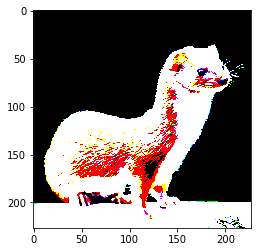

In [227]:
# RGB image example

fn = 'laska.png'
with tf.Graph().as_default():
    image_contents = tf.read_file(fn)
    image = tf.image.decode_image(image_contents, channels=3)
#     init_op = tf.initialize_all_tables()
    sess = tf.InteractiveSession()
#     with tf.Session() as sess:
#         sess.run(init_op)
#         tmp = sess.run(image)
#         print tmp.shape


    ct_img = tf.image.adjust_contrast(image,99999999999)
    save_img = ct_img.eval()
    plt.imshow(save_img)
    
#     ct_img = tf.image.adjust_brightness(image, 0.5)
#     save_img = ct_img.eval()
#     plt.imshow(save_img)
    

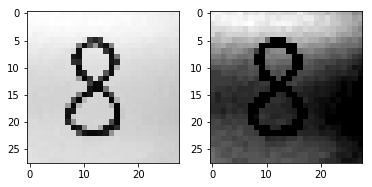

In [349]:
# constrast adjustment
# useless!!! 
ct_img = tf.image.adjust_contrast(std_img, 99)
ct_img2 = tf.clip_by_value(ct_img, 0, 255)
# ct_img2 = tf.cast(ct_img2, tf.uint8)

fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(std_img.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(ct_img2.eval()[:,:,0], cmap = 'gray')

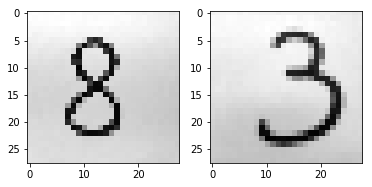

In [376]:
std_img = tf.image.per_image_standardization(img_r)
# show standardized image
# not useful at all!!!!!!!!!!!!!

fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img_resize.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(std_img.eval()[:,:,0], cmap = 'gray')